In [30]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
os.chdir('E:\\FCSE\\Introduction To Data science\\assignment 2')




In [31]:
pd.set_option('display.max_rows',30)
superMarket=pd.read_csv('supermarket_sales .csv')
superMarket

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


Text(0, 0.5, 'GrossIncome')

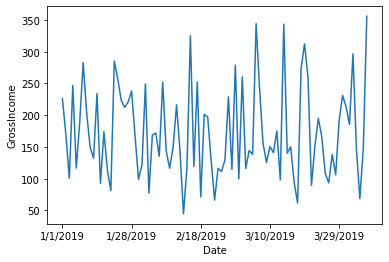

In [32]:
GrossIncomeOverDays=superMarket.groupby('Date')['gross income'].sum()

GrossIncomeOverDays.plot(x=GrossIncomeOverDays.index,y=GrossIncomeOverDays.values)
plt.ylabel('GrossIncome')




Text(0, 0.5, 'Total Sales')

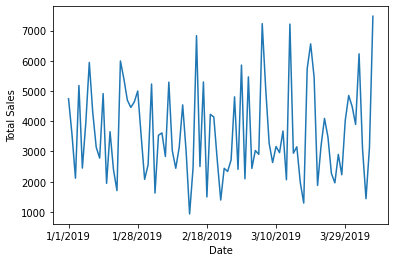

In [33]:
SalesOverDays=superMarket.groupby('Date')['Total'].sum()
SalesOverDays.plot(x=SalesOverDays.index, y=SalesOverDays.values)
plt.ylabel('Total Sales')




Text(0.5, 0, 'Branch Name')

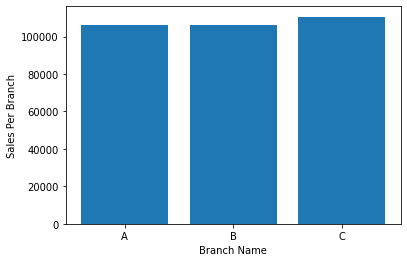

In [34]:
SalesPerBranch=superMarket.groupby('Branch')['Total'].sum()
plt.bar(SalesPerBranch.index,SalesPerBranch.values)
plt.ylabel('Sales Per Branch')
plt.xlabel('Branch Name')

Customer type,Member,Normal
Branch,,
A,53637.4755,52562.895
B,53704.6860,52492.986
C,56881.2825,53687.424


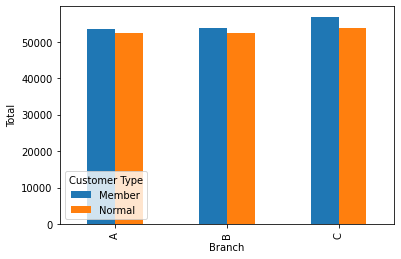

In [49]:
CustomerTypeSalesPerBranch=pd.DataFrame(superMarket.groupby(['Customer type', 'Branch'])['Total'].sum())

#CustomerTypeSalesPerBranch
#CustomerTypeSalesPerBranch.plot(x=['Customer type','Branch'],y=CustomerTypeSalesPerBranch.values,kind="bar")
#plt.ylabel('Total Sales')
#pd.crosstab(CustomerTypeSalesPerBranch.Total,CustomerTypeSalesPerBranch['Branch'],CustomerTypeSalesPerBranch['Customer type']).plot.bar()
#CustomerTypeSalesPerBranch.reset_index(inplace=True)
#CustomerTypeSalesPerBranch.set_index('Branch',inplace=True)
#CustomerTypeSalesPerBranch.set_index('Customer type')
CustomerTypeSalesPerBranch = CustomerTypeSalesPerBranch.pivot_table('Total','Branch', 'Customer type')

CustomerTypeSalesPerBranch.plot(kind="bar")
plt.ylabel('Total')
plt.legend(title='Customer Type',loc='lower left')
CustomerTypeSalesPerBranch
#214


(array([0, 1, 2]),
 [Text(0, 0, 'Mandalay'), Text(1, 0, 'Naypyitaw'), Text(2, 0, 'Yangon')])

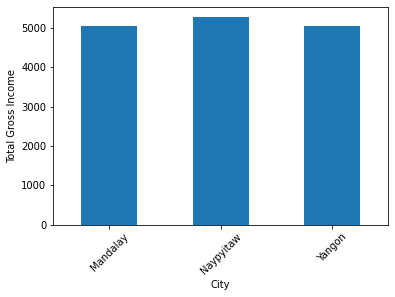

In [36]:
GrossIncomePerCity=superMarket.groupby("City")["gross income"].sum()
GrossIncomePerCity.plot(x=GrossIncomePerCity.index,y=GrossIncomePerCity.values,kind='bar')
plt.ylabel("Total Gross Income")
plt.xticks(rotation=45)

Text(0.5, 0, 'Branch Name')

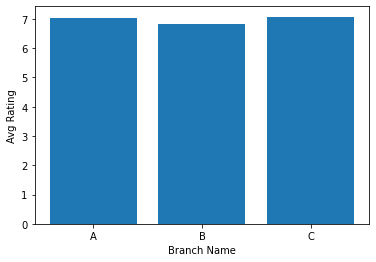

In [37]:
AvgRatePerBranch=superMarket.groupby('Branch')['Rating'].mean()
plt.bar(AvgRatePerBranch.index,AvgRatePerBranch.values)
plt.ylabel("Avg Rating")
plt.xlabel("Branch Name")

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

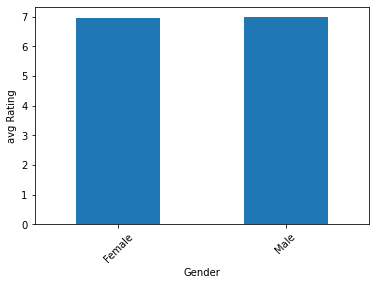

In [38]:
AvgRatePerGender=superMarket.groupby("Gender")["Rating"].mean().plot(kind="bar")
plt.ylabel("avg Rating")
plt.xticks(rotation=45)



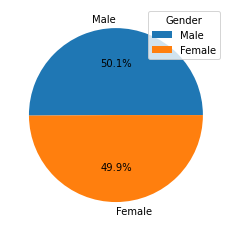

In [39]:
gender=superMarket.Gender.value_counts()
gender_labels=['Male','Female']
plt.pie(gender,labels=gender_labels,autopct='%.1f%%')
plt.legend(title='Gender')



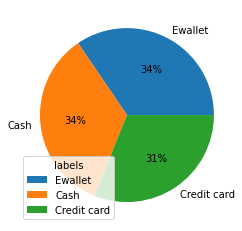

In [40]:
payment=superMarket.Payment.value_counts().to_dict()
labels = list(payment.keys())

values = list(payment.values())
plt.pie(values,labels=labels,autopct='%.0f%%')
plt.legend(title='labels',loc='lower left')



(array([0, 1, 2]),
 [Text(0, 0, 'Cash'), Text(1, 0, 'Credit card'), Text(2, 0, 'Ewallet')])

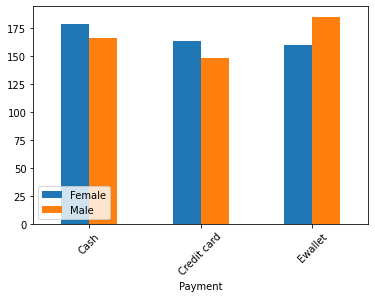

In [41]:
pd.crosstab(superMarket['Payment'],superMarket['Gender']).plot.bar()
plt.legend(loc='lower left')
plt.xticks(rotation=45)




(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Electronic accessories'),
  Text(1, 0, 'Fashion accessories'),
  Text(2, 0, 'Food and beverages'),
  Text(3, 0, 'Health and beauty'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Sports and travel')])

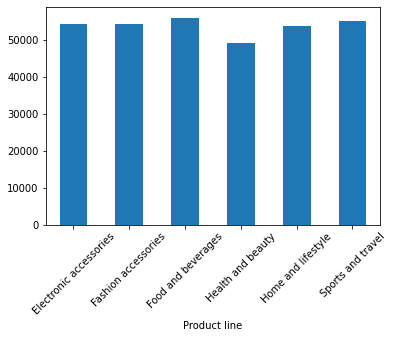

In [42]:
products_total_sales=superMarket.groupby('Product line')['Total'].sum().plot(kind='bar')
plt.xticks(rotation=45)
#254


